## پروژه نهایی داده کاوی گروه محمدرضا شهبازی 40119973 یکتا بیات 40116463

#### توجه : برای جلوگیری از گرفتن وقت ، شما میتوانید ابتدا بدون ران گرفتن پروژه خروجی های گرفته شده در سیستم بنده را در خروجی هر بخش مشاهده و بررسی کنید و سپس برای ارزیابی دقیق تر در صورت نیاز پروژه را پس از نصب نیازمندی های پروژه اجرا بفرمایید 

#### در ضمن در صورت بروز هر گونه ابهام یا مشکل در اجرا و ارزیابی پروژه ، بنده در هر ساعتی در تلگرام با آیدی زیر آماده پاسخگویی و رفع ابهام هستم با تشکر از توجه و وقت ارزشمند شما 

https://t.me/Mmreza_81

Step 1: Installing Required Libraries
Before proceeding, ensure you have the necessary libraries installed. Run this command in your terminal:

pip install pandas numpy matplotlib scikit-learn

## Importing the libraries
### importing essential libraries: pandas for data manipulation, numpy for numerical operations, and matplotlib for data visualization.

#### وارد کردن کتابخانه‌های ضروری برای پردازش داده‌ها، برای عملیات عددی و برای مصورسازی داده‌ها.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset
### Loading the store.csv and train.csv datasets using pandas.read_csv().
### Merging the two datasets on the Store_id column to create a comprehensive dataset for analysis.

####

In [2]:
dataset_store = pd.read_csv('store.csv')
dataset_train = pd.read_csv('train.csv')
merged_dataset = pd.merge(dataset_store, dataset_train, on='Store_id', how='left')
print(f"Shape of merged dataset: {merged_dataset.shape}")
print("\nFirst few rows of merged dataset:")
print(merged_dataset.head())


Shape of merged dataset: (1017209, 17)

First few rows of merged dataset:
   Store_id RetailType Stock variety  DistanceToRivalStore  RivalOpeningMonth  \
0         1          c             a                1270.0                9.0   
1         1          c             a                1270.0                9.0   
2         1          c             a                1270.0                9.0   
3         1          c             a                1270.0                9.0   
4         1          c             a                1270.0                9.0   

   RivalEntryYear  ContinuousBogo  ContinuousBogoSinceWeek  \
0          2008.0               0                      NaN   
1          2008.0               0                      NaN   
2          2008.0               0                      NaN   
3          2008.0               0                      NaN   
4          2008.0               0                      NaN   

   ContinuousBogoSinceYear ContinuousBogoMonths  DayOfWeek       D

## Taking care of missing data and merge data

#### Convert the Date column to datetime format and extract year, month, day, and week of year.
#### Fill missing values in DistanceToRivalStore with the median, and other columns with 0 or specific values like 'unknown' for ContinuousBogoMonths.
#### Drop unnecessary columns like Date and NumberOfCustomers.

In [3]:

merged_dataset['Date'] = pd.to_datetime(merged_dataset['Date'])

merged_dataset['Year'] = merged_dataset['Date'].dt.year
merged_dataset['Month'] = merged_dataset['Date'].dt.month
merged_dataset['Day'] = merged_dataset['Date'].dt.day
merged_dataset['WeekOfYear'] = merged_dataset['Date'].dt.isocalendar().week

distance_median = merged_dataset['DistanceToRivalStore'].median()
merged_dataset['DistanceToRivalStore'].fillna(distance_median, inplace=True)


merged_dataset['ContinuousBogoMonths'].fillna('unknown', inplace=True)
for col in merged_dataset.columns:
    if col != 'ContinuousBogoMonths':
        merged_dataset[col].fillna(0, inplace=True)

merged_dataset.drop(['Date', 'NumberOfCustomers'], axis=1, inplace=True)

print(merged_dataset.head())
print("\nMissing values after processing:")
print(merged_dataset.isnull().sum())


   Store_id RetailType Stock variety  DistanceToRivalStore  RivalOpeningMonth  \
0         1          c             a                1270.0                9.0   
1         1          c             a                1270.0                9.0   
2         1          c             a                1270.0                9.0   
3         1          c             a                1270.0                9.0   
4         1          c             a                1270.0                9.0   

   RivalEntryYear  ContinuousBogo  ContinuousBogoSinceWeek  \
0          2008.0               0                      0.0   
1          2008.0               0                      0.0   
2          2008.0               0                      0.0   
3          2008.0               0                      0.0   
4          2008.0               0                      0.0   

   ContinuousBogoSinceYear ContinuousBogoMonths  DayOfWeek  Sales  Is_Open  \
0                      0.0              unknown          5   5

## Seprate To X and y

In [4]:
X = merged_dataset.drop(['Sales'], axis=1)
y = merged_dataset['Sales']

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['RetailType', 'Stock variety', 'ContinuousBogoMonths'])
], remainder='passthrough')


X = np.array(ct.fit_transform(X))


## Splitting the dataset into the Training set and Test set

In [6]:
split_idx = int(len(X) * 0.7)

X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]


In [7]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.0 0.0 1.0 ... 7 31 31]
 [0.0 0.0 1.0 ... 7 30 31]
 [0.0 0.0 1.0 ... 7 29 31]
 ...
 [0.0 0.0 1.0 ... 11 9 45]
 [0.0 0.0 1.0 ... 11 8 45]
 [0.0 0.0 1.0 ... 11 7 45]]
[[0.0 0.0 1.0 ... 11 6 45]
 [0.0 0.0 1.0 ... 11 5 45]
 [0.0 0.0 1.0 ... 11 4 45]
 ...
 [0.0 0.0 0.0 ... 1 3 1]
 [0.0 0.0 0.0 ... 1 2 1]
 [0.0 0.0 0.0 ... 1 1 1]]
0         5263
1         5020
2         4782
3         5011
4         6102
          ... 
712041    4357
712042       0
712043    5472
712044    6087
712045    5406
Name: Sales, Length: 712046, dtype: int64
712046     5706
712047     6400
712048     7433
712049        0
712050     6161
           ... 
1017204    4771
1017205    4540
1017206    4297
1017207    3697
1017208       0
Name: Sales, Length: 305163, dtype: int64


## Featur Scalling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)
print(X_test)

[[-1.07055465 -0.13639136  2.67443006 ...  0.34843485  1.74080496
   0.51335146]
 [-1.07055465 -0.13639136  2.67443006 ...  0.34843485  1.62700697
   0.51335146]
 [-1.07055465 -0.13639136  2.67443006 ...  0.34843485  1.51320898
   0.51335146]
 ...
 [-1.07055465 -0.13639136  2.67443006 ...  1.55141021 -0.76275078
   1.48364584]
 [-1.07055465 -0.13639136  2.67443006 ...  1.55141021 -0.87654877
   1.48364584]
 [-1.07055465 -0.13639136  2.67443006 ...  1.55141021 -0.99034676
   1.48364584]]
[[-1.07055465 -0.13639136  2.67443006 ...  1.55141021 -1.10414475
   1.48364584]
 [-1.07055465 -0.13639136  2.67443006 ...  1.55141021 -1.21794274
   1.48364584]
 [-1.07055465 -0.13639136  2.67443006 ...  1.55141021 -1.33174072
   1.48364584]
 ...
 [-1.07055465 -0.13639136 -0.37391144 ... -1.45602819 -1.44553871
  -1.56585078]
 [-1.07055465 -0.13639136 -0.37391144 ... -1.45602819 -1.5593367
  -1.56585078]
 [-1.07055465 -0.13639136 -0.37391144 ... -1.45602819 -1.67313469
  -1.56585078]]


## Training the Linear Regression and Random Forest Regressor model on the Training set

## چند دقیقه ای برای یادگیری مدل ها زمان لازم است

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('Random Forest Performance:')
print(f'R2 Score: {r2_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')

Random Forest Performance:
R2 Score: 0.2727
RMSE: 3271.4784


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

y_pred_lr = lr_regressor.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print('Linear Regression Performance:')
print(f'R2 Score: {r2_lr:.4f}')
print(f'RMSE: {rmse_lr:.4f}')
print('\nRandom Forest Performance:')
print(f'R2 Score: {r2_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')

Linear Regression Performance:
R2 Score: 0.5413
RMSE: 2597.8963

Random Forest Performance:
R2 Score: 0.2727
RMSE: 3271.4784


Random Forest RMSPE Performance:
RMSPE: 63.1295%

Linear Regression RMSPE Performance:
RMSPE: 55.1016%


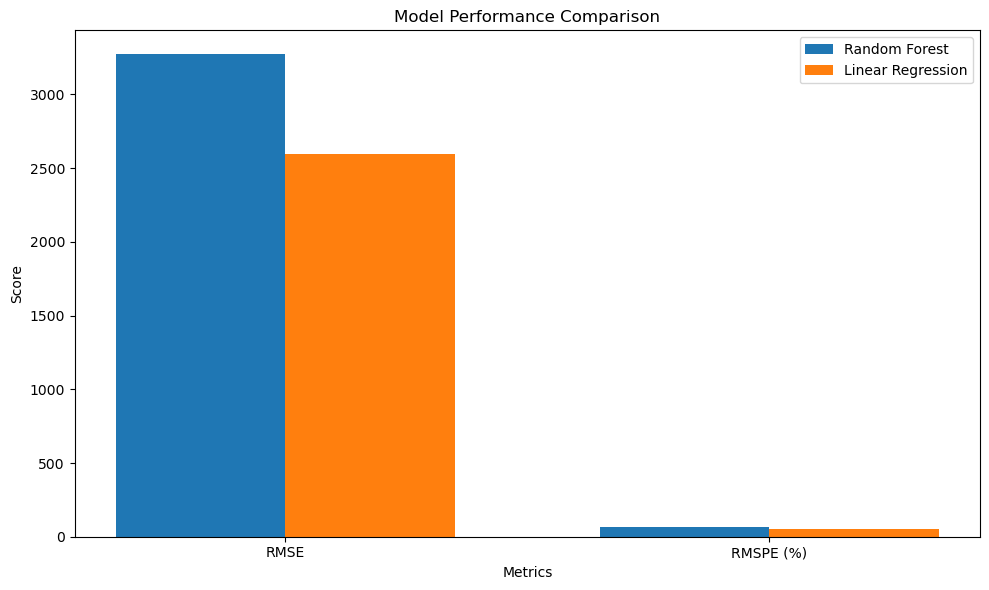

In [12]:
def rmspe(y_true, y_pred):
    mask = y_true != 0
    return np.sqrt(np.mean(np.square((y_true[mask] - y_pred[mask]) / y_true[mask]))) * 100

rmspe_rf = rmspe(y_test, y_pred_rf)
rmspe_lr = rmspe(y_test, y_pred_lr)

print('Random Forest RMSPE Performance:')
print(f'RMSPE: {rmspe_rf:.4f}%')

print('\nLinear Regression RMSPE Performance:')
print(f'RMSPE: {rmspe_lr:.4f}%')

plt.figure(figsize=(10, 6))
metrics = ['RMSE', 'RMSPE (%)']
rf_scores = [rmse_rf, rmspe_rf]
lr_scores = [rmse_lr, rmspe_lr]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, rf_scores, width, label='Random Forest')
plt.bar(x + width/2, lr_scores, width, label='Linear Regression')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()

## Visualising the Decision Tree Regression results (higher resolution)


Top 10 Most Important Features:
                               feature  importance
19                  remainder__Is_Open    0.461384
12     remainder__DistanceToRivalStore    0.106077
11                 remainder__Store_id    0.080736
20                     remainder__BOGO    0.072407
14           remainder__RivalEntryYear    0.039774
18                remainder__DayOfWeek    0.035639
17  remainder__ContinuousBogoSinceYear    0.027194
13        remainder__RivalOpeningMonth    0.027050
24                      remainder__Day    0.025851
25               remainder__WeekOfYear    0.022056


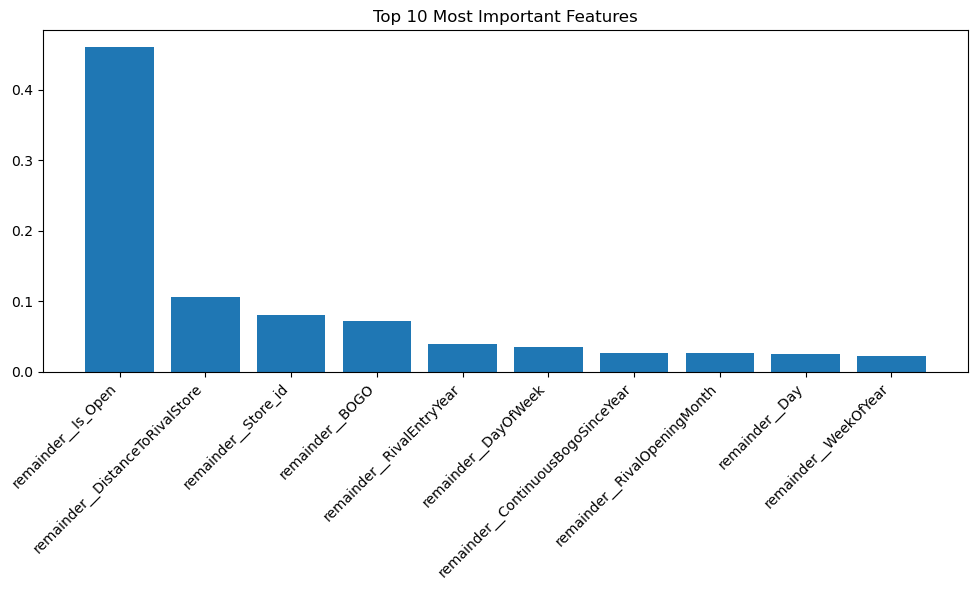

In [13]:
importances = rf_regressor.feature_importances_
feature_names = (ct.get_feature_names_out().tolist())

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))